# Content-Based Recommendation Engine

This recommendation engine takes in a seed track and outputs track recommendations based on similarity measures

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

## 1. Read the recommendation pool

In [2]:
#read data
chart_tracks_df= pd.read_csv("BTS_spotify_daily_charts_tracks_predicted_genres.csv")
chart_tracks_df = chart_tracks_df.fillna(0)
opm = pd.read_csv('OPM_spotify_daily_charts_tracks_predicted_genres.csv')

chart_tracks_df = pd.concat([chart_tracks_df,opm]).reset_index()

#normalize loudness and tempo
scaler = MinMaxScaler()
chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])
chart_tracks_df

,index,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,...,valence,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_electronic_prob,predicted_pop_prob,predicted_rnb_prob,playlist_id,playlist_name
0,0,6QBZlIxCB2lAPU2bM1ut1p,Dynamite - Instrumental,3Nrfpe0tUJi4K4DXYWgMUX,BTS,3zWmE5c3alhuoPLphxjMVd,198770,2020-08-21,29,0.861,...,0.6250,0.377977,0,electronic,0.98,1.000000,0.000000,0.000000,NaN,NaN
1,1,1HZ5LJMCzClg2pdomCnEPw,Dynamite - EDM Remix,3Nrfpe0tUJi4K4DXYWgMUX,BTS,2UX7xCHxzTLKuEom7VdwMJ,198939,2020-08-24,23,0.707,...,0.3180,0.433263,0,electronic,0.96,0.964286,0.035714,0.000000,NaN,NaN
2,2,5raJ9QoZOdoRZ1MZOcygkR,INTRO : Calling,3Nrfpe0tUJi4K4DXYWgMUX,BTS,1nScVw87kRJiT2bg2Kswhp,84613,2020-07-14,58,0.486,...,0.0806,0.568675,0,electronic,0.96,0.964286,0.000000,0.035714,NaN,NaN
3,3,0usLRFLmYXYahKNgXxsuJc,Trivia 起 : Just Dance,3Nrfpe0tUJi4K4DXYWgMUX,BTS,2lATw9ZAVp7ILQcOKPCPqp,225220,2018-08-24,68,0.723,...,0.3980,0.445778,0,electronic,0.82,0.821429,0.178571,0.000000,NaN,NaN
4,4,2JZPlXE8c0oLZoCsqFFmgo,Dynamite - Poolside Remix,3Nrfpe0tUJi4K4DXYWgMUX,BTS,6K4chJALBBMYmXjwgvqahx,182591,2020-08-28,60,0.686,...,0.4060,0.438954,0,electronic,0.78,0.785714,0.214286,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1213,4EFinQKVMVKnPqIU6RZbWO,Mga Kababayan,1ayiGn4MLc427PozR13p1y,FrancisM,1XqiSs5j7RV7kYVPhZCRmX,322040,2009,38,0.743,...,0.5840,0.280820,2,rnb,0.36,0.035714,0.785714,0.178571,4EFinQKVMVKnPqIU6RZbWO,4EFinQKVMVKnPqIU6RZbWO
1317,1214,4f2N5TmeBDDHjBuuGUgFF7,The Yes Yes Show,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,3O938XtV5tBLuV4CiW55ys,292093,2004,44,0.608,...,0.6010,0.329108,0,electronic,0.36,0.500000,0.321429,0.178571,4f2N5TmeBDDHjBuuGUgFF7,4f2N5TmeBDDHjBuuGUgFF7
1318,1215,4VgrLYLervdW5bvAlnUmOK,Walang Hanggan,1YHVP6devH4bmmBZp8g8SC,Don Barredo,1PLAlskgtSaOEZHRiCEIr3,253714,2020-06-05,15,0.782,...,0.5050,0.566880,2,rnb,0.36,0.357143,0.392857,0.250000,4VgrLYLervdW5bvAlnUmOK,4VgrLYLervdW5bvAlnUmOK
1319,1216,63AWRNGp5CdVF9EHyb945T,Picture Mo Inday,3oP7ApvM9dvIXP6AufxCxt,Grin Department,5OwcI85oeyGW11qnOPBG4a,183933,2009-10-15,0,0.867,...,0.9610,0.513429,2,rnb,0.36,0.214286,0.428571,0.357143,63AWRNGp5CdVF9EHyb945T,63AWRNGp5CdVF9EHyb945T


In [3]:
chart_tracks_df.describe()

,index,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre_prob,predicted_electronic_prob,predicted_pop_prob,predicted_rnb_prob
count,1321.000000,1.321000e+03,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,565.031037,2.517736e+05,34.811506,0.547228,0.504984,5.330053,0.672125,0.856170,0.052878,0.430849,0.010057,0.160162,0.407988,0.449087,1.006056,0.613823,0.261166,0.510355,0.228480
std,369.464789,5.357927e+04,22.228770,0.137111,0.217482,3.533830,0.150546,0.351051,0.056276,0.309086,0.065609,0.117019,0.206661,0.189302,0.445475,0.122638,0.221117,0.168039,0.162152
min,0.000000,7.650600e+04,0.000000,0.144000,0.040300,0.000000,0.000000,0.000000,0.023200,0.000037,0.000000,0.030600,0.046700,0.000000,0.000000,0.340000,0.000000,0.000000,0.000000
25%,227.000000,2.194930e+05,21.000000,0.458000,0.331000,2.000000,0.583059,1.000000,0.030200,0.132000,0.000000,0.095600,0.241000,0.286034,1.000000,0.520000,0.071429,0.392857,0.107143
50%,557.000000,2.468160e+05,38.000000,0.554000,0.478000,6.000000,0.695160,1.000000,0.035300,0.423000,0.000001,0.117000,0.373000,0.470872,1.000000,0.620000,0.214286,0.500000,0.214286
75%,887.000000,2.797610e+05,50.000000,0.643000,0.679000,9.000000,0.782149,1.000000,0.050300,0.727000,0.000049,0.176000,0.548000,0.567134,1.000000,0.700000,0.428571,0.642857,0.321429
max,1217.000000,1.037586e+06,100.000000,0.890000,0.972000,11.000000,1.000000,1.000000,0.884000,0.981000,0.870000,0.955000,0.978000,1.000000,2.000000,1.000000,1.000000,0.964286,0.785714


In [4]:
chart_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1321 non-null   int64  
 1   track_id                   1321 non-null   object 
 2   track_name                 1321 non-null   object 
 3   artist_id                  1321 non-null   object 
 4   artist_name                1321 non-null   object 
 5   album_id                   1321 non-null   object 
 6   duration                   1321 non-null   int64  
 7   release_date               1321 non-null   object 
 8   popularity                 1321 non-null   int64  
 9   danceability               1321 non-null   float64
 10  energy                     1321 non-null   float64
 11  key                        1321 non-null   int64  
 12  loudness                   1321 non-null   float64
 13  mode                       1321 non-null   int64

## 2. Input Seed Track


In [5]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

In [6]:
seed_track_data = chart_tracks_df[chart_tracks_df['track_name']=='Dynamite - Instrumental'].iloc[0]
seed_track_data[feature_cols]

danceability           0.861
energy                 0.658
loudness            0.707636
speechiness             0.05
acousticness         0.00903
instrumentalness       0.803
liveness              0.0443
valence                0.625
tempo               0.377977
Name: 0, dtype: object

## 3. Explore Similarity Measures

In [7]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity


##### Use audio features only

Euclidean

In [8]:
chart_tracks_df['euclidean_dist'] = chart_tracks_df.apply(lambda x: euclidean_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist')[:10]
recommendation_df[['track_name','artist_name','euclidean_dist','predicted_genre']+feature_cols]

,track_name,artist_name,euclidean_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
102,Go Go,BTS,0.005,rnb,0.856,0.617,0.775517,0.0841,0.17100,0.000000,0.0857,0.759,0.513851
1319,Picture Mo Inday,Grin Department,0.006,rnb,0.867,0.801,0.688584,0.0655,0.30400,0.000000,0.0783,0.961,0.513429
1204,Maldita,KinoBuds,0.007,rnb,0.854,0.512,0.736073,0.0850,0.01150,0.000003,0.1620,0.392,0.235350
1064,Prinsesa,6cyclemind,0.008,pop,0.853,0.455,0.633653,0.0371,0.30400,0.003170,0.1250,0.511,0.428754
1157,Ivana,Soulstice,0.009,rnb,0.870,0.483,0.733379,0.2970,0.28100,0.000000,0.0526,0.611,0.312064
1311,Wait for You,a.v.d.i,0.010,electronic,0.851,0.578,0.687854,0.0581,0.00934,0.000343,0.0825,0.658,0.452235
1058,Binibini,Matthaios,0.010,pop,0.851,0.352,0.508037,0.0749,0.73700,0.000000,0.1210,0.536,0.407772
1303,For The Night,Sober,0.014,pop,0.847,0.523,0.794612,0.0793,0.11800,0.000007,0.1240,0.655,0.465212
876,Ditso,Brian Pepito,0.021,pop,0.840,0.221,0.324018,0.0918,0.50700,0.000018,0.1100,0.401,0.458584
1121,Nadarang,Shanti Dope,0.022,rnb,0.839,0.535,0.754932,0.0799,0.60900,0.000000,0.1150,0.693,0.426766


Manhattan

In [9]:
chart_tracks_df['manhattan_dist'] = chart_tracks_df.apply(lambda x: manhattan_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist')[:10]
recommendation_df[['track_name','artist_name','manhattan_dist','predicted_genre']+feature_cols]

,track_name,artist_name,manhattan_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
102,Go Go,BTS,0.005,rnb,0.856,0.617,0.775517,0.0841,0.17100,0.000000,0.0857,0.759,0.513851
1319,Picture Mo Inday,Grin Department,0.006,rnb,0.867,0.801,0.688584,0.0655,0.30400,0.000000,0.0783,0.961,0.513429
1204,Maldita,KinoBuds,0.007,rnb,0.854,0.512,0.736073,0.0850,0.01150,0.000003,0.1620,0.392,0.235350
1064,Prinsesa,6cyclemind,0.008,pop,0.853,0.455,0.633653,0.0371,0.30400,0.003170,0.1250,0.511,0.428754
1157,Ivana,Soulstice,0.009,rnb,0.870,0.483,0.733379,0.2970,0.28100,0.000000,0.0526,0.611,0.312064
1311,Wait for You,a.v.d.i,0.010,electronic,0.851,0.578,0.687854,0.0581,0.00934,0.000343,0.0825,0.658,0.452235
1058,Binibini,Matthaios,0.010,pop,0.851,0.352,0.508037,0.0749,0.73700,0.000000,0.1210,0.536,0.407772
1303,For The Night,Sober,0.014,pop,0.847,0.523,0.794612,0.0793,0.11800,0.000007,0.1240,0.655,0.465212
876,Ditso,Brian Pepito,0.021,pop,0.840,0.221,0.324018,0.0918,0.50700,0.000018,0.1100,0.401,0.458584
1121,Nadarang,Shanti Dope,0.022,rnb,0.839,0.535,0.754932,0.0799,0.60900,0.000000,0.1150,0.693,0.426766


Cosine

In [10]:
chart_tracks_df['cosine_dist'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  seed_track_data[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
425,Bahay Kubo,Hale,0.047859,electronic,0.585,0.715,0.783242,0.0293,0.01240,0.3850,0.1020,0.433,0.439156
1,Dynamite - EDM Remix,BTS,0.051742,electronic,0.707,0.838,0.799099,0.0599,0.00190,0.4440,0.0961,0.318,0.433263
192,Ulan,Rivermaya,0.058248,electronic,0.534,0.736,0.763790,0.0276,0.05190,0.5290,0.3340,0.752,0.555770
1309,Masilungan,Sandwich,0.066248,rnb,0.551,0.473,0.557717,0.0260,0.29600,0.2990,0.1340,0.423,0.374304
1101,Shooting Star,Sondmire,0.069311,pop,0.465,0.649,0.600685,0.0338,0.00093,0.2300,0.0850,0.344,0.280176
1131,Senti,Yano,0.078240,pop,0.712,0.293,0.568904,0.0294,0.33800,0.3720,0.0762,0.294,0.305920
1078,Bahay Kubo,Hale,0.084781,electronic,0.589,0.736,0.800502,0.0289,0.01200,0.2210,0.0877,0.390,0.439418
810,Maling Tadhana,Lapis,0.094715,electronic,0.476,0.842,0.809543,0.0405,0.14900,0.3610,0.1500,0.351,0.535935
1120,Take No,Hale,0.115202,electronic,0.577,0.658,0.775297,0.0306,0.42900,0.4150,0.1280,0.194,0.517662
1143,Nasaan Ka?,Pupil,0.121067,pop,0.673,0.706,0.812237,0.0303,0.00571,0.0765,0.1230,0.415,0.534801


View histograms of the 3 similarity measures

array([[<AxesSubplot:title={'center':'euclidean_dist'}>,
        <AxesSubplot:title={'center':'manhattan_dist'}>],
       [<AxesSubplot:title={'center':'cosine_dist'}>, <AxesSubplot:>]],
      dtype=object)

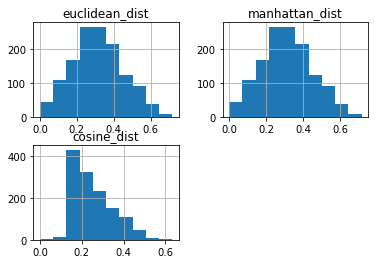

In [11]:
chart_tracks_df[['euclidean_dist','manhattan_dist','cosine_dist']].hist()

## 4. Modify similarity criteria

##### Audio features and with same predicted genre

In [12]:
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

<ipython-input-12-3525b1bc5e04>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
425,Bahay Kubo,Hale,0.047859,electronic,0.585,0.715,0.783242,0.0293,0.012400,0.385000,0.1020,0.433,0.439156
1,Dynamite - EDM Remix,BTS,0.051742,electronic,0.707,0.838,0.799099,0.0599,0.001900,0.444000,0.0961,0.318,0.433263
192,Ulan,Rivermaya,0.058248,electronic,0.534,0.736,0.763790,0.0276,0.051900,0.529000,0.3340,0.752,0.555770
1078,Bahay Kubo,Hale,0.084781,electronic,0.589,0.736,0.800502,0.0289,0.012000,0.221000,0.0877,0.390,0.439418
810,Maling Tadhana,Lapis,0.094715,electronic,0.476,0.842,0.809543,0.0405,0.149000,0.361000,0.1500,0.351,0.535935
1120,Take No,Hale,0.115202,electronic,0.577,0.658,0.775297,0.0306,0.429000,0.415000,0.1280,0.194,0.517662
1311,Wait for You,a.v.d.i,0.122887,electronic,0.851,0.578,0.687854,0.0581,0.009340,0.000343,0.0825,0.658,0.452235
85,Telepathy,BTS,0.125910,electronic,0.787,0.669,0.815435,0.0428,0.007820,0.000000,0.1230,0.570,0.322561
103,Rewind,Joko Reantaso,0.126138,electronic,0.305,0.952,0.720137,0.4770,0.000991,0.870000,0.1670,0.376,0.706369
80,Dynamite,BTS,0.128216,electronic,0.746,0.765,0.812282,0.0993,0.011200,0.000000,0.0936,0.737,0.378247


###### Audio features and genre probabilities

In [15]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
cols = feature_cols + genre_cols
chart_tracks_df['cosine_dist_mod'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[cols].values.reshape(1, -1),\
                                                                  seed_track_data[cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                   .sort_values('cosine_dist_mod')
recommendation_df[['track_name','artist_name','cosine_dist_mod','predicted_genre']+cols]

,track_name,artist_name,cosine_dist_mod,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_electronic_prob,predicted_pop_prob,predicted_rnb_prob
1,Dynamite - EDM Remix,BTS,0.038261,electronic,0.707,0.8380,0.799099,0.0599,0.00190,0.444000,0.0961,0.318,0.433263,0.964286,0.035714,0.000000
192,Ulan,Rivermaya,0.066261,electronic,0.534,0.7360,0.763790,0.0276,0.05190,0.529000,0.3340,0.752,0.555770,0.678571,0.250000,0.071429
1260,Bawat Kaluluwa,IV Of Spades,0.107837,electronic,0.705,0.5190,0.740274,0.0341,0.06090,0.032400,0.3050,0.521,0.420233,0.785714,0.214286,0.000000
1224,Panaginip,Keiko Necesario,0.107966,pop,0.686,0.6740,0.785342,0.0248,0.17400,0.000025,0.3080,0.664,0.381876,0.928571,0.035714,0.035714
650,Ang Pinagmulan,IV Of Spades,0.114257,pop,0.550,0.7630,0.801096,0.0345,0.00366,0.020600,0.2260,0.532,0.280119,0.821429,0.178571,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,DKL (Di Ko Alam),Miss Ramonne,0.624947,pop,0.471,0.0680,0.384566,0.0496,0.98100,0.000082,0.1220,0.233,0.583152,0.035714,0.785714,0.178571
196,Fire,Fred Engay,0.641690,pop,0.266,0.1500,0.477397,0.0362,0.89800,0.000004,0.1200,0.187,0.801108,0.000000,0.750000,0.250000
213,Georgia,Jay Celada,0.643941,pop,0.348,0.2110,0.307215,0.0338,0.91400,0.000010,0.1240,0.240,0.713864,0.000000,0.857143,0.142857
253,Tila,Clara Benin,0.672723,pop,0.513,0.0640,0.041370,0.0332,0.96100,0.000880,0.0996,0.314,0.566255,0.000000,0.571429,0.428571


In [19]:
pop_df = recommendation_df.sort_values(by=['loudness', 'acousticness', 'energy', 'instrumentalness'], ascending = False)
pop_df[['artist_name','track_name', 'predicted_genre']].head(50)

,artist_name,track_name,predicted_genre
1067,Sarah Geronimo,Tala,pop
1046,Sponge Cola,Bitiw,pop
1124,FRANCO,Next Train Out,pop
540,Sponge Cola,Tuliro,pop
663,Sponge Cola,Nakapagtataka,pop
885,BGYO,The Light,pop
1075,Autotelic,Gising,electronic
1028,Orange & Lemons,Yakap Sa Dilim,pop
985,Orange & Lemons,Yakap Sa Dilim,pop
1129,Autotelic,Laro,electronic


In [14]:
recommendation_df['track_id'].values

array(['1HZ5LJMCzClg2pdomCnEPw', '4ZcFwr9dULQB3ZFs89h5nZ',
       '2gnVqlNifLIGvinryubyG4', '2vqAmth0yZZbBxwmVdE9V2',
       '45Nm4dwbrahPabtJQj8Cf0', '4ep1R2y3S3kqPK3h0trHtJ',
       '04k8msdaFjYXfehLG8w77A', '47BQgeFgAZDPGPClQim2qs',
       '5raJ9QoZOdoRZ1MZOcygkR', '03iCbZaM4OkRR4We6wIzvx'], dtype=object)